# Statistical Foundations
### in Python, using pandas, numpy, and scipy

So far, we've learned how to handle data - but we also need to know how to understand it and analyze it in convincing ways. Statistics is the core of this - it can reveal what is typical or an outlier, what relationships exist between different variables, and whether assumptions we have are likely or not.

In order to do this, we are going to use the Python libraries `numpy` and `scipy`. Both of these libraries offer greater mathematical precision and access to a wide variety of statistical methods and tests, which we can apply to a data set loaded in pandas. For the sake of this tutorial, we also use matplotlib to show some intuitive visualizations - but you don't need to worry about tinkering with these yet.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [20]:
# REMOVE ME LATER
import geopandas as gpd
gdf = gpd.read_file('./data/ont-ed_stats_2025.gpkg')
gdf = gdf[['geoname', 'num_pop_tot', 'num_imm_tot', 'num_imm_new', 'avg_hou_inc', 'num_vm_tot', 'cons1_pct', 'lib_pct', 'ndp_pct', 'oth_pct']]
gdf = gdf.round({
    'num_pop_tot': 0,
    'num_imm_tot': 0,
    'num_imm_new': 0,
    'avg_hou_inc': 0,
    'num_vm_tot': 0,
    'cons1_pct': 2,
    'lib_pct': 2, 
    'ndp_pct': 2,
    'oth_pct': 2
})
gdf = gdf.rename(columns={'geoname': 'riding_name', 'cons1_pct': 'cons_pct'})
gdf.to_csv('./data/ont-ed_stats_2025.csv', index=False)

For this tutorial, we are going to use election and census data that was adapted for [a project](https://schoolofcities.github.io/gta-immigration/political-shifts) published by the School of Cities looking at immigrant vote patterns in the GTA. The data we are using is adapted from the [2025 Ontario election](https://en.wikipedia.org/wiki/2025_Ontario_general_election) and the [2021 Canadian census](https://en.wikipedia.org/wiki/2021_Canadian_census). The data frame has the following columns:
 - riding_name: the name of the riding
 - num_pop_tot: the number of people in the riding
 - num_imm_tot: the number of immigrants in the riding
 - num_imm_new: the number of new immigrants in the riding
 - avg_hou_inc: the average household income in the riding
 - num_vm_tot: the number of visible minority individuals in the riding
 - cons_pct: the vote percent for the Progressive Conservative party
 - lib_pct: the vote percent for the Liberal Party
 - ndp_pct: the vote percent for the New Democratic Party (NDP)
 - oth_pct: the vote percent for other parties

In [21]:
df = pd.read_csv('./data/ont-ed_stats_2025.csv')
df.head()

,riding_name,num_pop_tot,num_imm_tot,num_imm_new,avg_hou_inc,num_vm_tot,cons_pct,lib_pct,ndp_pct,oth_pct
0,Brampton Centre,102309.0,48275.0,14985.0,2103308.0,68880.0,51.85,33.92,8.77,5.45
1,Scarborough—Rouge Park,102256.0,52637.0,8294.0,2175218.0,77090.0,52.98,34.75,10.38,1.89
2,Scarborough North,94688.0,60423.0,11513.0,2048275.0,87647.0,52.98,34.75,10.38,1.89
3,Ajax,115392.0,47716.0,8721.0,3826212.0,74759.0,44.16,44.96,7.01,3.87
4,Beaches—East York,106811.0,33588.0,9031.0,3114587.0,39034.0,21.38,51.17,22.94,4.51


## Descriptive statistics: the shape of the data

### Central tendency

What is "typical" in a set of data? This is at the heart of the notion of the central tendency in statistics. There are three common ways to measure this, with a accompanying functions.
 - Mean (`np.mean()`): the average of all values
 - Median (`np.median()`): the "middle" value if you order them, ie. at the 50th percentile 
 - Mode (`stats.mode()`): the most common value

Let's compute some of these central tendency statistics for the NDP, and compare them to the distribution of vote shares in all ridings.

In [42]:
party_var = 'ndp_pct'

mean = np.mean(df[party_var])
median = np.median(df[party_var])
mode = stats.mode(df[party_var])

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode.mode} (appears {mode.count} times)")

Mean: 14.11
Median: 6.88
Mode: 3.95 (appears 2 times)


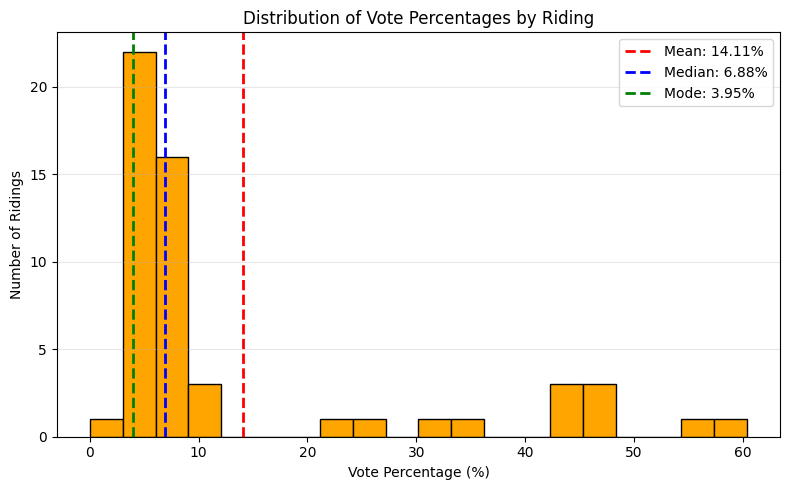

In [45]:
plt.figure(figsize=(8, 5))
plt.hist(df[party_var], bins=20, color='orange', edgecolor='black')

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}%')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}%')
plt.axvline(mode.mode, color='green', linestyle='--', linewidth=2, label=f'Mode: {mode.mode:.2f}%')

plt.title('Distribution of Vote Percentages by Riding')
plt.xlabel('Vote Percentage (%)')
plt.ylabel('Number of Ridings')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Notice the difference between the mean and the median. While the mean accounts for all of the data directly, it is also sensitive to outliers and can be pulled in one direction or another. 

**Try setting the variable `party_var` to different parties to see how the matter of mean vs. median plays out for different distributions**.

### Dispersion

Similar to how we ask what is typical in a set of data, it's also important to ask how that data varies. This is what we refer to when we talk about the dispersion of a distribution, and there are four common measures (with functions):
 - Standard deviation (`np.std()`): How spread out data points are from the mean, in the same units as the original data.
 - Variance (`np.var()`): The average squared deviation from the mean, representing how wildly individual values differ from the average or overall unevenness.
 - Range (`np.max() - np.min()`): The difference between the maximum and minimum values, showing the total spread of the dataset.
 - Interquartile range (`np.percentile(..., [25, 75])`): The range of the middle 50% of data (Q3–Q1), reducing sensitivity to outliers.

Let's take a look at how the number of immigrants across different ridings varies, and compare it with the mean and median.

In [61]:
col_var = 'num_imm_tot'

mean = np.mean(df[col_var])
median = np.median(df[col_var])
std_dev = np.std(df[col_var], ddof=1)
variance = np.var(df[col_var])
data_range = np.max(df[col_var]) - np.min(df[col_var])
q1, q3 = np.percentile(df[col_var], [25, 75])
iqr = q3 - q1

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print('===')
print(f"Std Dev: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Range: {data_range:.2f}")
print(f"IQR: {iqr:.2f}")

Mean: 52330.33
Median: 54255.00
===
Std Dev: 13630.44
Variance: 182348372.93
Range: 62964.00
IQR: 18211.50


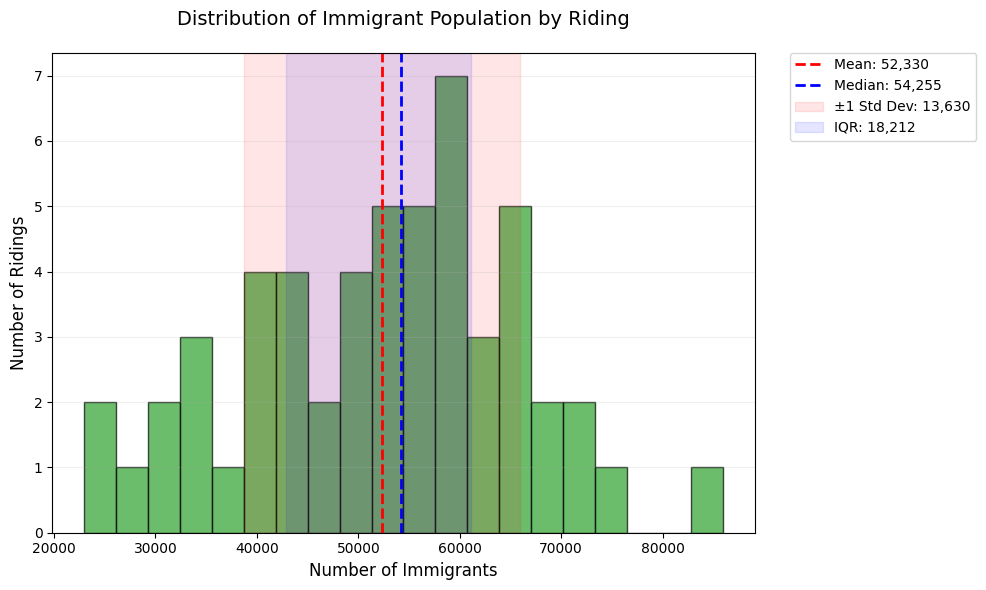

In [62]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Histogram
n, bins, patches = plt.hist(df[col_var], bins=20, color='#2ca02c', edgecolor='black', alpha=0.7)

# Central tendency
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:,.0f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:,.0f}')

# Dispersion visualization
plt.axvspan(mean - std_dev, mean + std_dev, color='red', alpha=0.1, label=f'±1 Std Dev: {std_dev:,.0f}')
plt.axvspan(q1, q3, color='blue', alpha=0.1, label=f'IQR: {iqr:,.0f}')

# Annotations
plt.title('Distribution of Immigrant Population by Riding', pad=20, fontsize=14)
plt.xlabel('Number of Immigrants', fontsize=12)
plt.ylabel('Number of Ridings', fontsize=12)
plt.grid(axis='y', alpha=0.2)

# Smart legend positioning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

Take a look at how different measures of dispersion capture different parts of the data. **Once again, set `col_var` to a different variable or two and examine the different measures of dispersion and how they play out**.

## Bivariate analysis: finding similarities in the data

### Correlation

Correlation measures how closely two variables move together, ranging from -1 (as X increases, Y decreases), to +1 (as X increases, Y increases). A value near 0 indicates no linear association. While it is acceptable to use the word 'relationship' here instead of 'association', it's worth noting that a strong correlation is not enough to show causation -- namely, if we had a correlation value of 1, we can't definitively say that Y increases *because* X increases, only that they increase together.

We'll be looking at a very common measure called Pearson correlation. It measures how closely two variables follow a straight-line relationship, ideal for normally distributed data with linear trends (e.g., height vs. weight). While we won't look at it today, it's worth independently looking into "Spearman Rank Correlation" as well - which can capture nonlinear trends.

We'll look at the example of vote share for the Progressive Conservatives and the number of immigrants in a riding below. In the project that this data was drawn from, we used correlation to show how immigrant voters in the GTA are shifting conservative over time.

In [86]:
census_var = 'num_imm_tot'
party_var = 'cons_pct'

r, p_val = stats.pearsonr(df[census_var], df[party_var])
print(f"Pearson corr: {r:.2f} (p-value: {p_val:.3f})")

Pearson corr: 0.40 (p-value: 0.003)


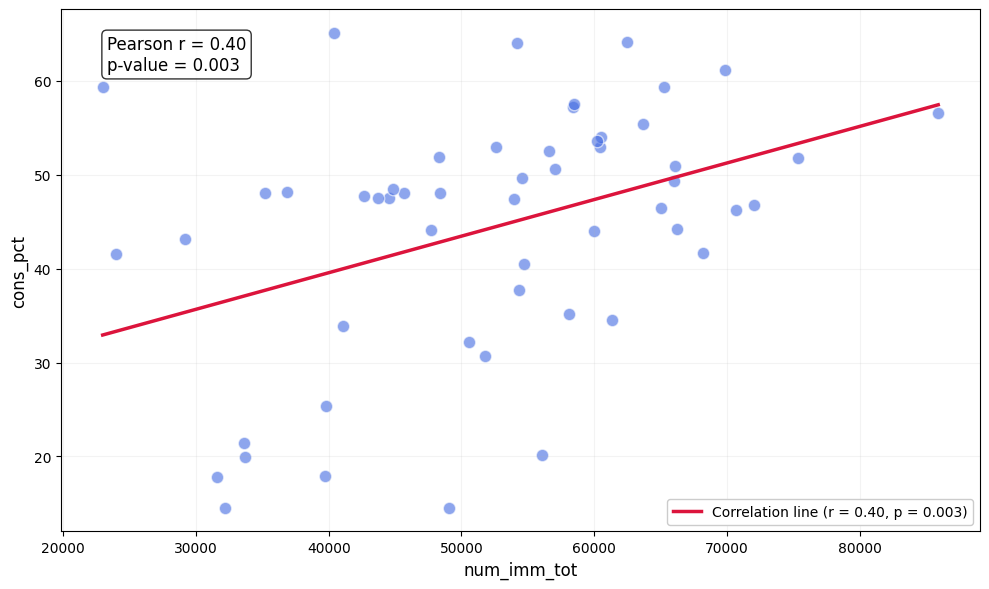

In [87]:
# Create figure
plt.figure(figsize=(10, 6))
plt.scatter(df[census_var], df[party_var], 
            color='royalblue', alpha=0.6, edgecolor='white', s=80)

# Regression line
slope, intercept, r_value, p_value, _ = stats.linregress(df[census_var], df[party_var])
x_range = np.array([df[census_var].min(), df[census_var].max()])
regression_line = intercept + slope * x_range
plt.plot(x_range, regression_line, 
         color='crimson', linewidth=2.5,
         label=f'Correlation line (r = {r_value:.2f}, p = {p_value:.3f})')

# Annotations
plt.xlabel(f'{census_var}', fontsize=12)
plt.ylabel(f'{party_var}', fontsize=12)
plt.grid(alpha=0.15)

# Correlation text box
textstr = f'Pearson r = {r_value:.2f}\np-value = {p_value:.3f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(loc='lower right', framealpha=1)
plt.tight_layout()
plt.show()

Here we can see a trend between the two variables we have chosen. **Try setting `census_var` and `party_var` to different column values and see if there is a trendline between those as well, or not!**

### Covariance

/covariance matrix

## Linear regression: relationships between variables

### Simple regression

### Other kinds of regression

## Hypothesis testing: making conclusions

### One-Sample t-test

### Two-Sample t-test

### P-values